Задание
1. Реализовать модель предпочительного присоединения для числа объектов ď 2500. В
качестве параметра использовать вероятность p создания новой структуры;
2. Исследовать макроскопические параметры модели предпочтительного присоединения:
найти показатель распределения a и его зависимость от параметра p

p=0.05, alpha=0.49
p=0.11, alpha=0.71
p=0.18, alpha=0.86
p=0.24, alpha=1.03
p=0.31, alpha=1.21
p=0.37, alpha=1.37
p=0.44, alpha=1.56
p=0.50, alpha=1.80
p=0.56, alpha=2.05
p=0.63, alpha=2.30
p=0.69, alpha=2.61
p=0.76, alpha=2.98
p=0.82, alpha=3.40
p=0.89, alpha=4.21
p=0.95, alpha=5.04


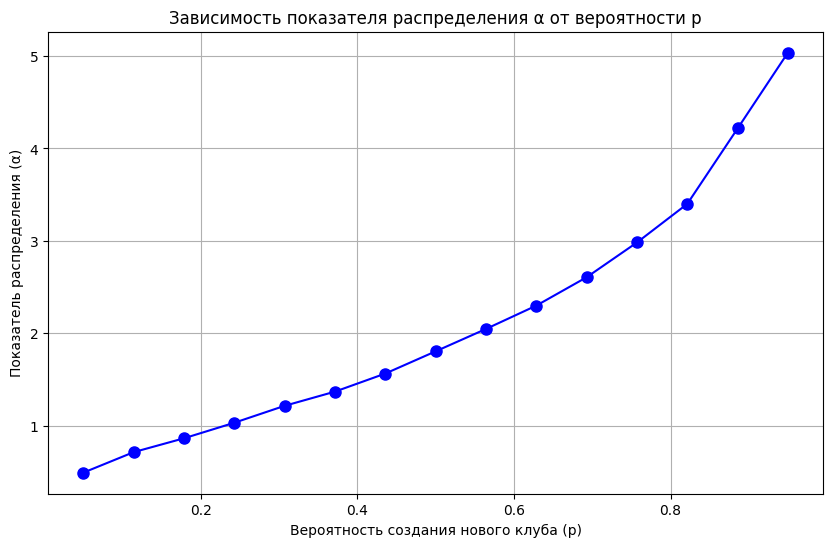

In [1]:
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

def simulate(p, n=2000):
    """Модель предпочтительного присоединения с вероятностью p создания нового клуба."""
    clubs = [1]  # Первый студент создает клуб
    for t in range(2, n + 1):
        if random.random() < p:
            clubs.append(1)  # Создаем новый клуб
        else:
            # Выбираем клуб пропорционально текущим размерам
            chosen_index = random.choices(range(len(clubs)), weights=clubs, k=1)[0]
            clubs[chosen_index] += 1
    return clubs

def calculate_alpha(sizes):
    """Оценка показателя степенного распределения через линейную регрессию."""
    counts = Counter(sizes)
    if len(counts) < 2:
        return np.nan  # Недостаточно данных для регрессии
    # Логарифмируем данные
    x = np.log10(list(counts.keys()))
    y = np.log10(list(counts.values()))
    # Линейная регрессия
    slope, _ = np.polyfit(x, y, 1)
    return -slope  # Показатель alpha

# Параметры исследования
p_values = np.linspace(0.05, 0.95, 15)  # Исключаем крайние значения для устойчивости
alpha_values = []
num_runs = 20  # Количество прогонов для усреднения

for p in p_values:
    alphas = []
    for _ in range(num_runs):
        clubs = simulate(p)
        alpha = calculate_alpha(clubs)
        if not np.isnan(alpha):
            alphas.append(alpha)
    # Усредняем полученные значения alpha
    if alphas:
        avg_alpha = np.mean(alphas)
    else:
        avg_alpha = np.nan
    alpha_values.append(avg_alpha)
    print(f"p={p:.2f}, alpha={avg_alpha:.2f}")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(p_values, alpha_values, 'bo-', markersize=8)
plt.xlabel('Вероятность создания нового клуба (p)')
plt.ylabel('Показатель распределения (α)')
plt.title('Зависимость показателя распределения α от вероятности p')
plt.grid(True)
plt.show()

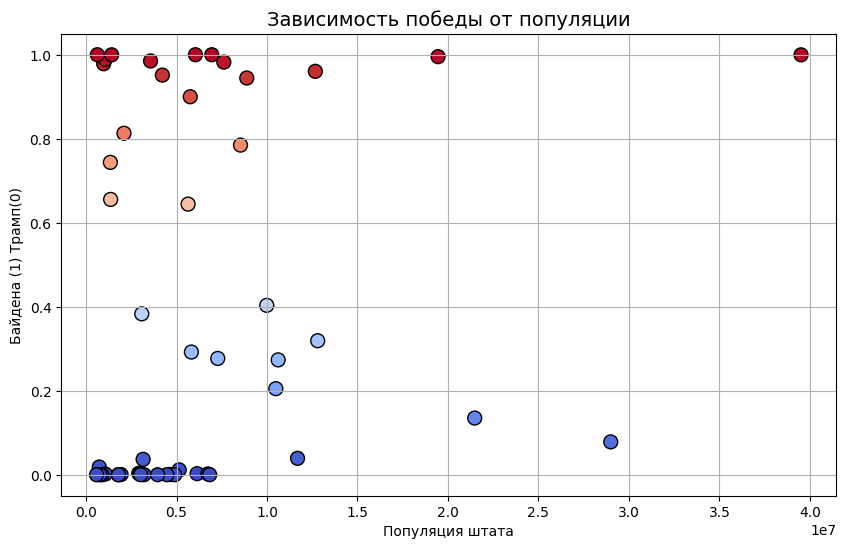

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['population'], y, c=y, cmap='coolwarm', edgecolors='k', s=100)
plt.title("Зависимость победы от популяции", fontsize=14)
plt.xlabel("Популяция штата")
plt.ylabel("Байдена (1) Трамп(0)")
plt.grid(True)
plt.show()

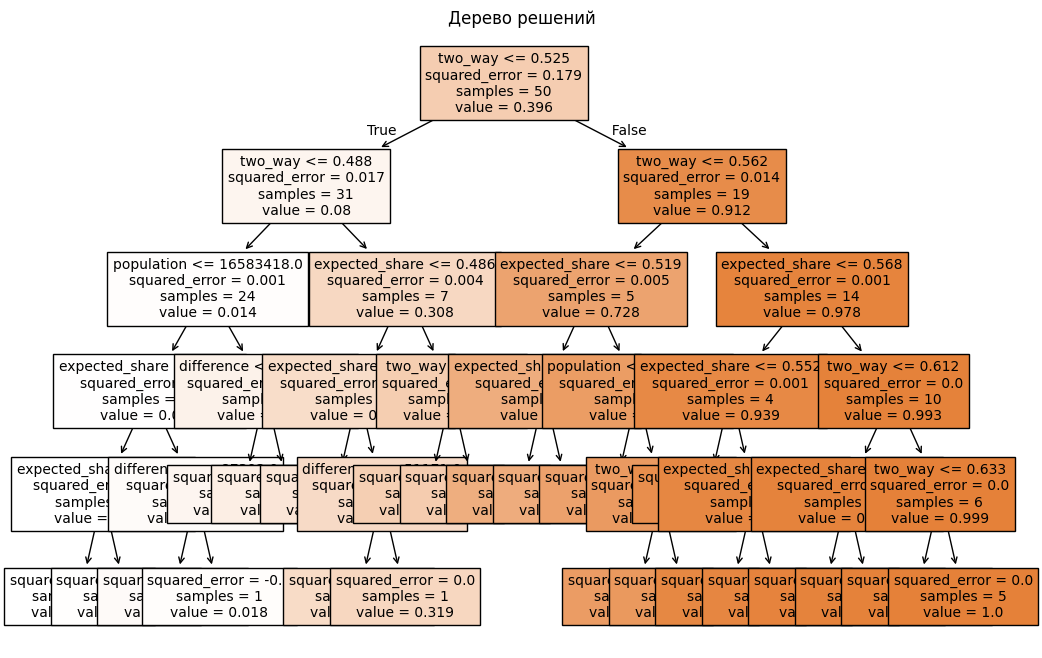

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X, y)
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Дерево решений")
plt.show()


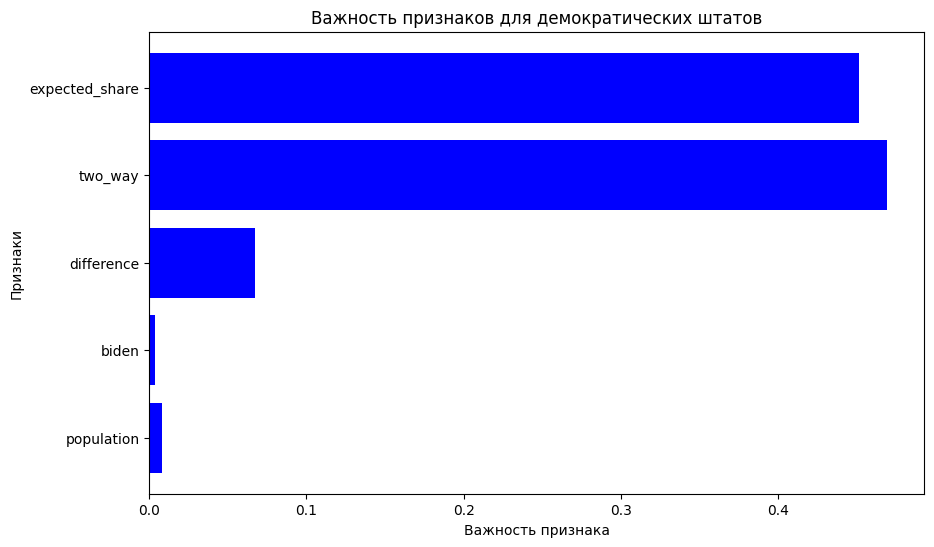

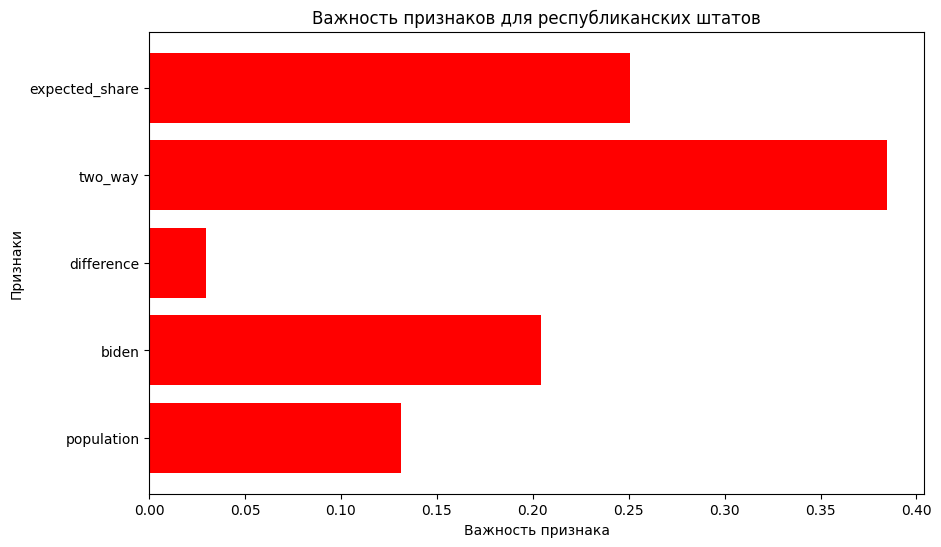

In [ ]:
df['party'] = np.where(df['biden'] > df['trump'], 'Democratic', 'Republican')

X_democratic = X[df['party'] == 'Democratic']
y_democratic = y[df['party'] == 'Democratic']
model_democratic = RandomForestRegressor(n_estimators=100)
model_democratic.fit(X_democratic, y_democratic)
importance_democratic = model_democratic.feature_importances_

X_republican = X[df['party'] == 'Republican']
y_republican = y[df['party'] == 'Republican']
model_republican = RandomForestRegressor(n_estimators=100)
model_republican.fit(X_republican, y_republican)
importance_republican = model_republican.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance_democratic, color='blue')
plt.title("Важность признаков для демократических штатов")
plt.xlabel("Важность признака")
plt.ylabel("Признаки")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance_republican, color='red')
plt.title("Важность признаков для республиканских штатов")
plt.xlabel("Важность признака")
plt.ylabel("Признаки")
plt.show()


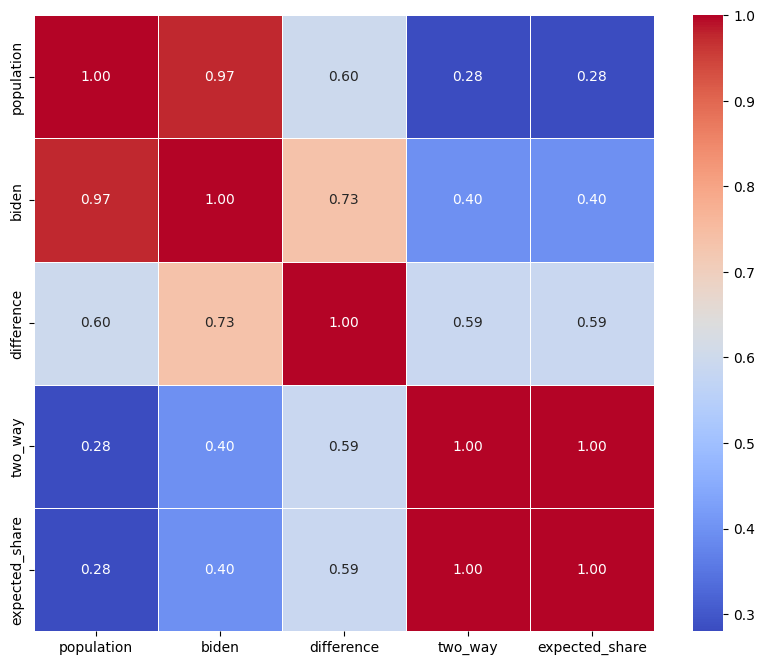

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


средняя ошибка: 0.016097669223923937
r2 Score: 0.8456744043963359


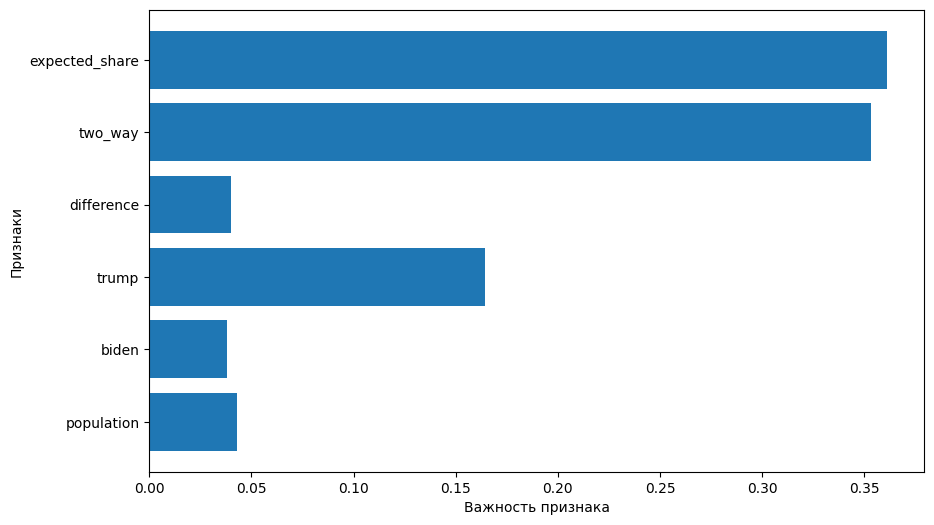

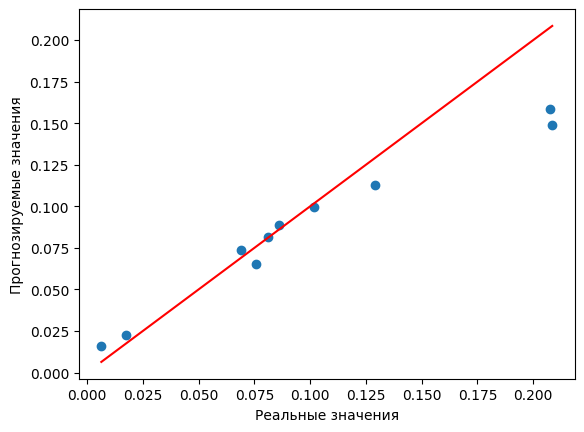

In [ ]:
df['stability_index'] = np.abs(df['biden'] - df['trump']) / df['population']
X = df[['population', 'biden', 'trump', 'difference', 'two_way', 'expected_share']]
y = df['stability_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn.metrics import mean_absolute_error, r2_score
print(f'средняя ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'r2 Score: {r2_score(y_test, y_pred)}')

#важность признаков для прогнозирования устойчивости
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Важность признака")
plt.ylabel("Признаки")
plt.show()

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Реальные значения")
plt.ylabel("Прогнозируемые значения")
plt.show()


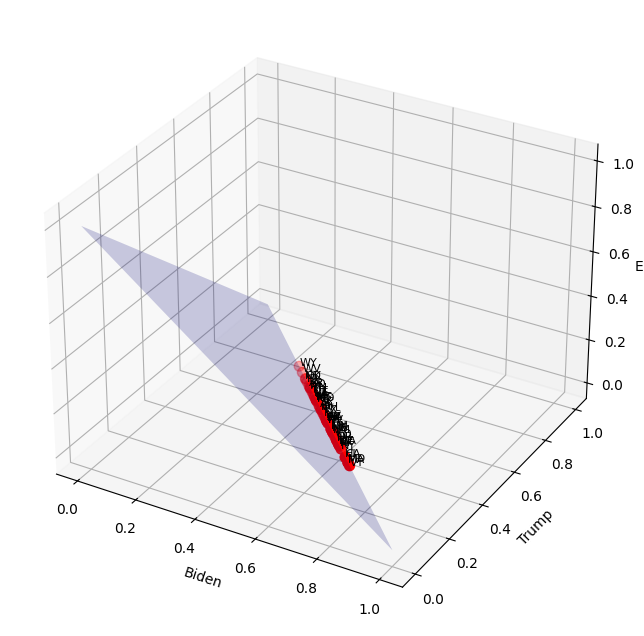

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

states = df['state']
biden_S = df['biden']
trump_S = df['trump']
total_population = df['population']

biden_S_P = biden_S / (biden_S + trump_S)
trump_S_P = trump_S / (biden_S + trump_S)
E_P = 1 - biden_S_P - trump_S_P

def transform_to_3d(biden_percent, trump_percent, third_party_percent):
    return biden_percent, trump_percent, third_party_percent

x_3d, y_3d, z_3d = transform_to_3d(biden_S_P, trump_S_P, E_P)

def plot_simplex_3d(x_3d, y_3d, z_3d, states):
    T = plt.figure(figsize=(10, 8))
    ax = T.add_subplot(111, projection='3d')

    simplex_x = np.array([1, 0, 0])
    simplex_y = np.array([0, 1, 0])
    simplex_z = np.array([0, 0, 1])
    ax.plot_trisurf([1, 0, 0], [0, 1, 0], [0, 0, 1], color='b', alpha=0.2)
    ax.scatter(x_3d, y_3d, z_3d, c='r', s=50)

    for i, state in enumerate(states):
        ax.text(x_3d[i], y_3d[i], z_3d[i], state, fontsize=8, color='black')

    ax.set_xlabel("Biden")
    ax.set_ylabel("Trump")
    ax.set_zlabel("Else")
    plt.show()

plot_simplex_3d(x_3d, y_3d, z_3d, states)
